In [1]:
import pandas as pd
import numpy as np
import pydotplus 
import io
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import misc
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
#from sklearn.model_selection import CridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline


url = 'https://raw.githubusercontent.com/firasm/PIMS-BCFSA/master/New_Sample_Clean_latest.csv'
#url ='https://raw.githubusercontent.com/shughestr/PIMS_2020_Real_Estate_data/master/sample_clean.csv'
  
df = pd.read_csv(url, error_bad_lines=False)
df=df.dropna()
# in this step, we removed 2 columns 
for col in df.columns:
    if len(df[col].unique())==1:
        df.drop(col,inplace=True,axis=1)


In [2]:
from itertools import product

def check_cardinality(df):

    combinations_lst = list(product(df.columns, df.columns))
    relations = ['one_to_one', 'one_to_many', 'many_to_one']

    output = []
    for col1, col2 in combinations_lst:
        for relation in relations:
            try:
                pd.merge(df[[col1]], df[[col2]], left_on=col1, right_on=col2, validate=relation)
                output.append([col1, col2, relation])
            except:
                continue

    return output



In [3]:
def get_relation(df, col1, col2):        
    first_max = df[[col1, col2]].groupby(col1).count().max()[0]
    second_max = df[[col1, col2]].groupby(col2).count().max()[0]
    if first_max==1:
        if second_max==1:
            return 'one-to-one'
        else:
            return 'one-to-many'
    else:
        if second_max==1:
            return 'many-to-one'
        else:
            return 'many-to-many'

from itertools import product
for col_i, col_j in product(df.columns, df.columns):
    if col_i == col_j:
        continue
    print(col_i, col_j, get_relation(df, col_i, col_j))

Unnamed: 0 ADDRESS one-to-many
Unnamed: 0 ASSESSED_VALUE one-to-many
Unnamed: 0 COMM_CODE one-to-many
Unnamed: 0 COMM_NAME one-to-many
Unnamed: 0 LATITUDE one-to-many
Unnamed: 0 LONGITUDE one-to-many
Unnamed: 0 ROLL_NUMBER one-to-many
Unnamed: 0 Year one-to-many
Unnamed: 0 location one-to-many
Unnamed: 0 fsa one-to-many
Unnamed: 0 pct_change one-to-many
Unnamed: 0 YEAR_OF_CONSTRUCTION one-to-many
Unnamed: 0 saf1 one-to-many
Unnamed: 0 saf2 one-to-many
Unnamed: 0 saf3 one-to-many
Unnamed: 0 saf4 one-to-many
Unnamed: 0 saf5 one-to-many
Unnamed: 0 saf6 one-to-many
Unnamed: 0 saf7 one-to-many
Unnamed: 0 saf8 one-to-many
Unnamed: 0 mr5y one-to-many
Unnamed: 0 Inflation one-to-many
Unnamed: 0 pop1 one-to-many
Unnamed: 0 pop2 one-to-many
Unnamed: 0 pop3 one-to-many
Unnamed: 0 pop4 one-to-many
Unnamed: 0 pop5 one-to-many
Unnamed: 0 pop6 one-to-many
Unnamed: 0 lan1 one-to-many
Unnamed: 0 lan2 one-to-many
Unnamed: 0 inc1 one-to-many
Unnamed: 0 inc2 one-to-many
Unnamed: 0 inc3 one-to-many
Unnamed

In [4]:
#df.isnull().values.any()


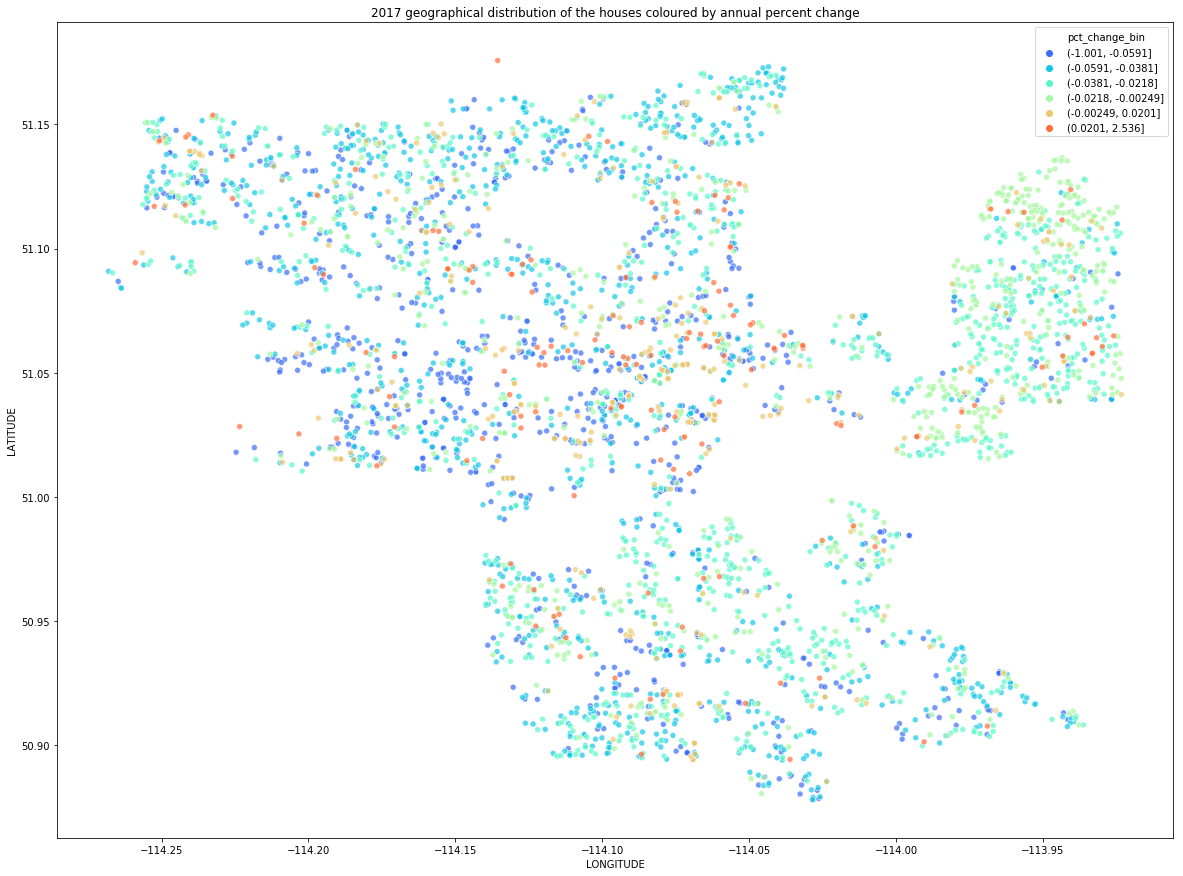

In [5]:
df['pct_change_bin'] = pd.qcut(df['pct_change'], q=6)

df=df.sort_values('pct_change_bin')

sns.set_palette("rainbow")

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2017 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2017], hue = 'pct_change_bin', ax=ax ,alpha=0.7)

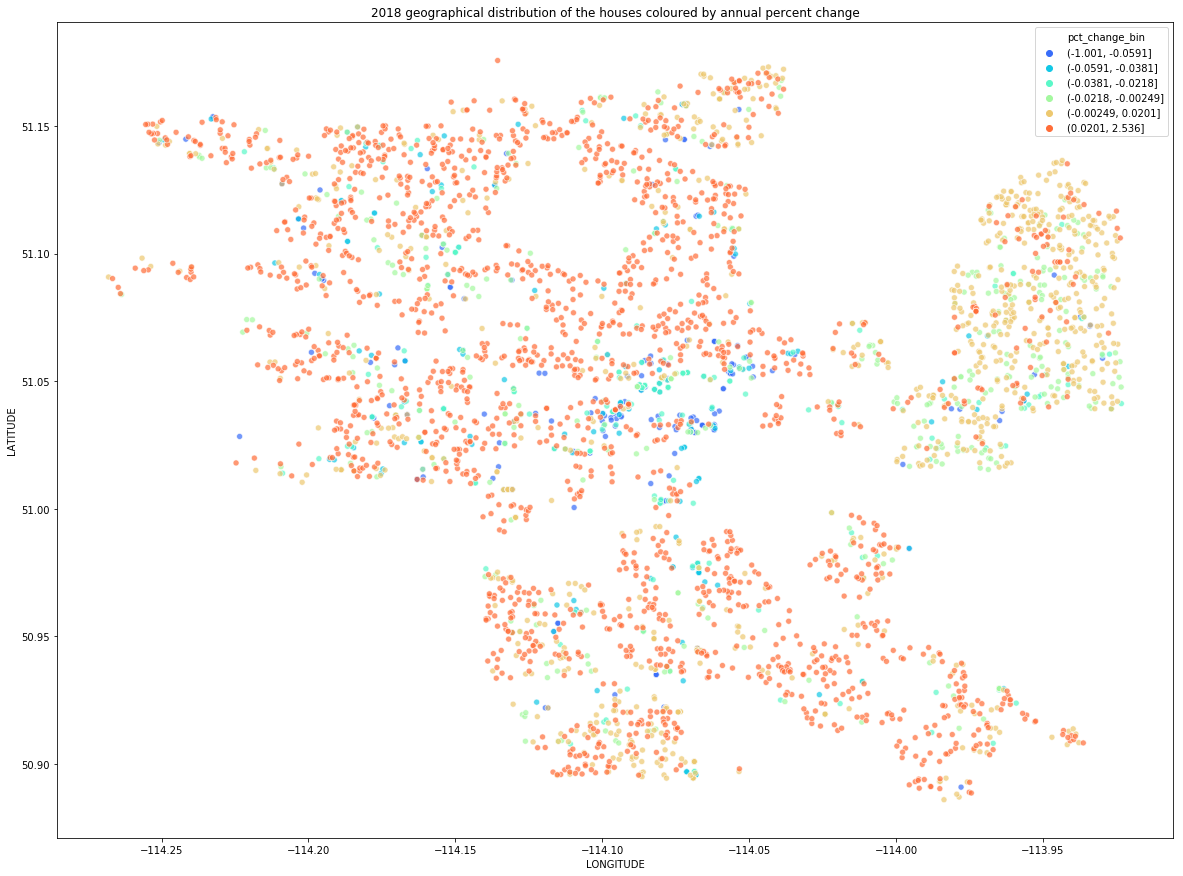

In [6]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2018 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2018], hue = 'pct_change_bin', ax=ax, alpha=0.7)

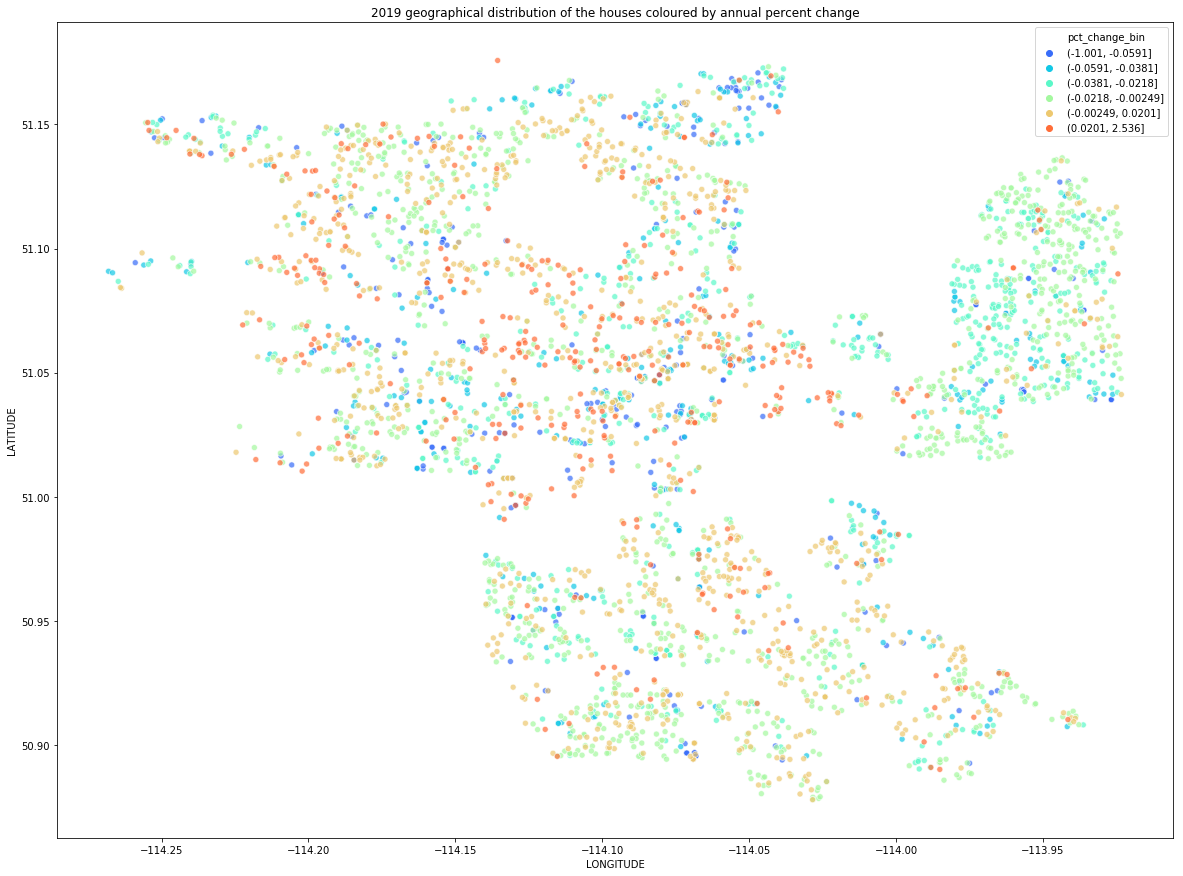

In [7]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2019 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2019], hue = 'pct_change_bin', ax=ax, alpha=0.7)

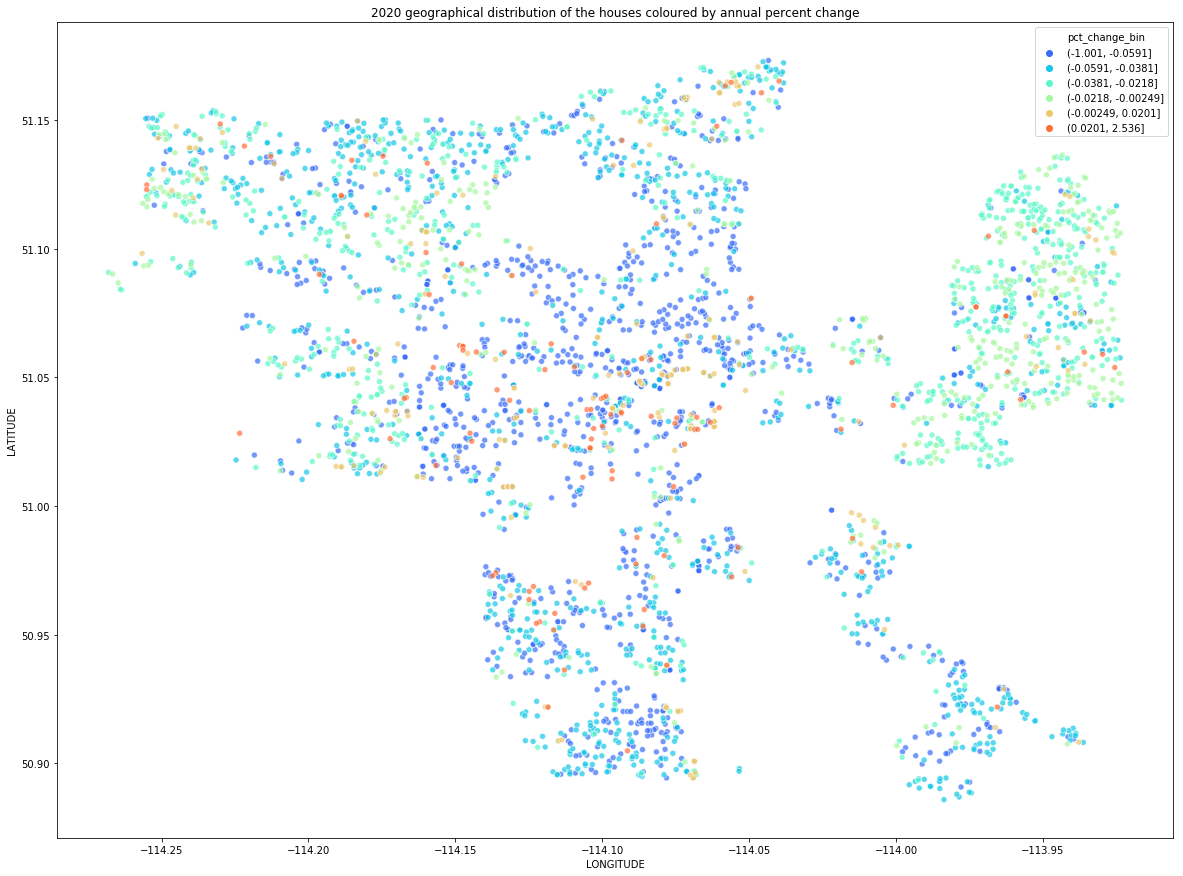

In [8]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2020 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2020], hue = 'pct_change_bin', ax=ax, alpha=0.7)

Text(0.5, 0, 'Year')

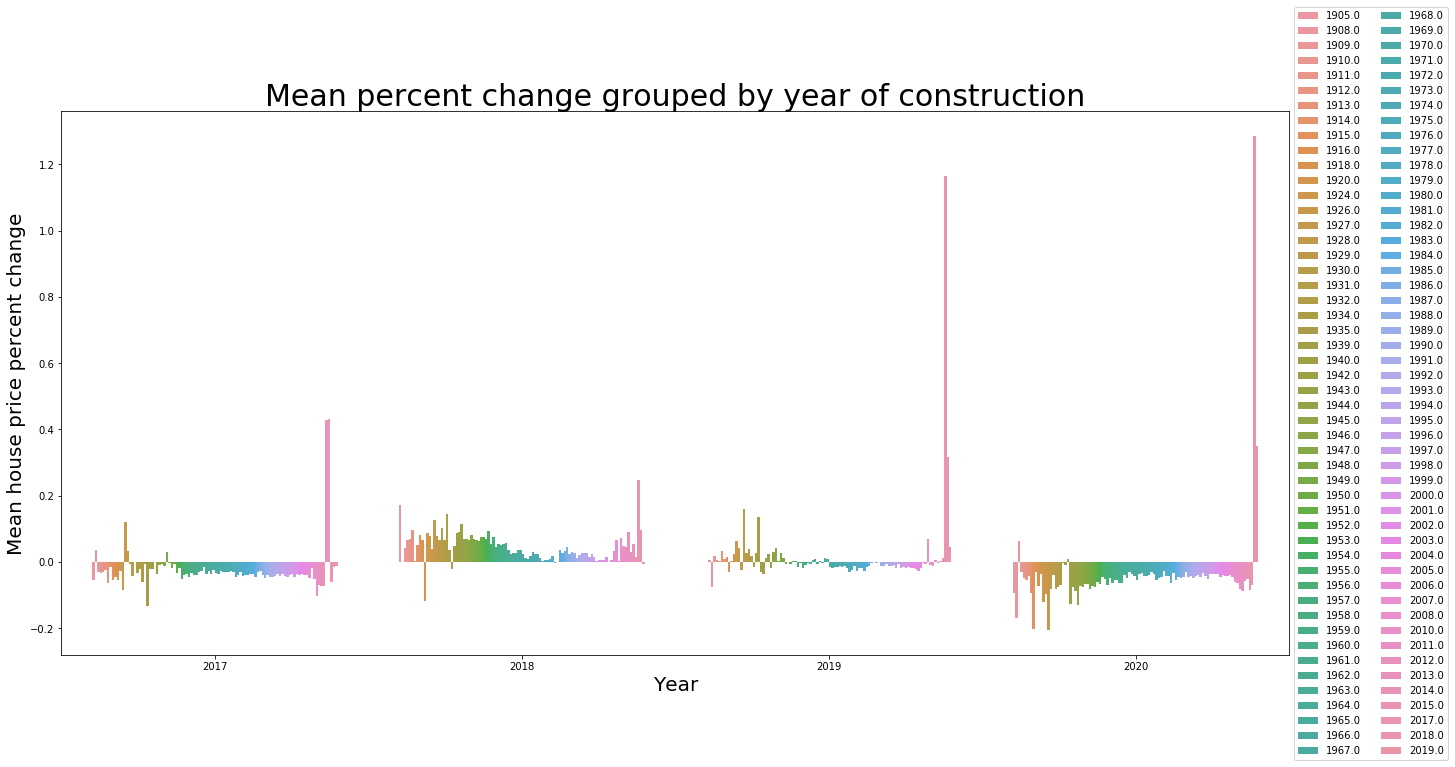

In [9]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title('Mean percent change grouped by year of construction', fontsize = 30)
sns.barplot(data = df, x = 'Year', y = 'pct_change', hue = 'YEAR_OF_CONSTRUCTION', estimator = np.mean, ci=None).legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=2)
ax.set_ylabel('Mean house price percent change', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

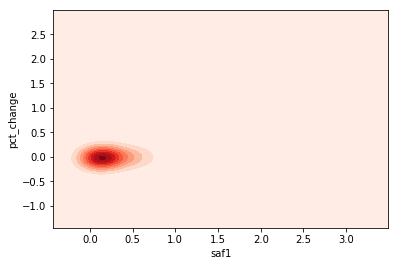

In [10]:
sns.kdeplot(df['saf1'], df['pct_change'], cmap="Reds", shade=True, bw=.15)
#sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2020], hue = 'pct_change_bin', ax=ax, alpha=0.7)

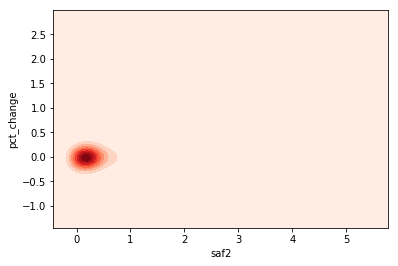

In [11]:
sns.kdeplot(df['saf2'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


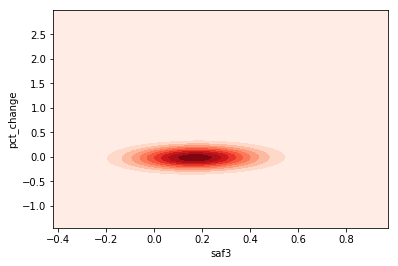

In [12]:
sns.kdeplot(df['saf3'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


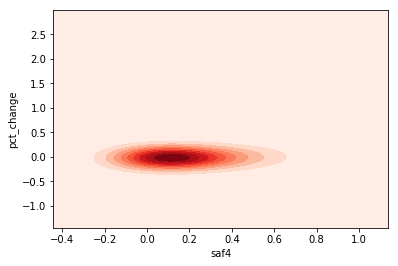

In [13]:
sns.kdeplot(df['saf4'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


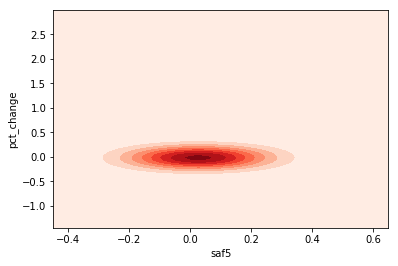

In [14]:
sns.kdeplot(df['saf5'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


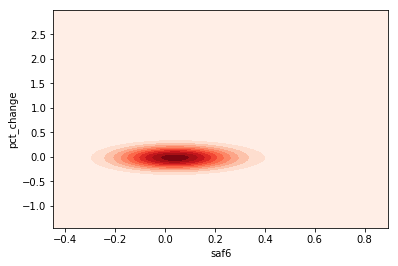

In [15]:
sns.kdeplot(df['saf6'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


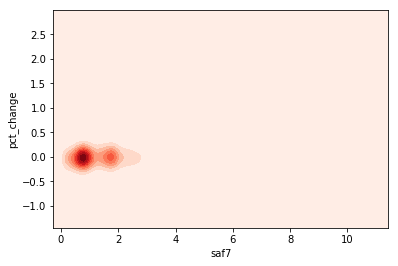

In [16]:
sns.kdeplot(df['saf7'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


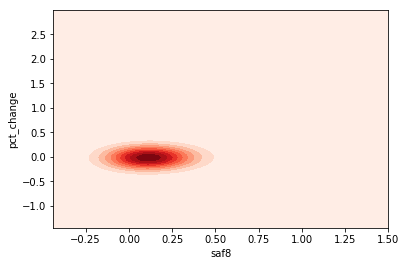

In [17]:
sns.kdeplot(df['saf8'], df['pct_change'], cmap="Reds", shade=True, bw=.15)

In [18]:
df['pct_change_bin']=pd.cut(df['pct_change'], bins=np.linspace(df['pct_change'].quantile(0.01), df['pct_change'].quantile(0.99), 7),labels=range(0,6))


df=df.dropna()
df.keys()

Index(['Unnamed: 0', 'ADDRESS', 'ASSESSED_VALUE', 'COMM_CODE', 'COMM_NAME',
       'LATITUDE', 'LONGITUDE', 'ROLL_NUMBER', 'Year', 'location', 'fsa',
       'pct_change', 'YEAR_OF_CONSTRUCTION', 'saf1', 'saf2', 'saf3', 'saf4',
       'saf5', 'saf6', 'saf7', 'saf8', 'mr5y', 'Inflation', 'pop1', 'pop2',
       'pop3', 'pop4', 'pop5', 'pop6', 'lan1', 'lan2', 'inc1', 'inc2', 'inc3',
       'inc4', 'own1', 'own2', 'own3', 'own4', 'lab1', 'lab2', 'lab3',
       'vacancy_rate', 'walk_score_comm', 'transit_score_comm',
       'bike_score_comm', 'comm_polulation', 'pct_change_bin'],
      dtype='object')

In [19]:
#np.linspace(df['pct_change'].quantile(0.01), df['pct_change'].quantile(0.99), 6)

In [20]:

df_num = df.drop(['Unnamed: 0','ADDRESS','COMM_CODE','COMM_NAME','location','fsa','comm_polulation'],axis=1)


In [21]:
from sklearn import preprocessing
x=df_num.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).values
#min_max_scaler=preprocessing.MinMaxScaler()
#x_scaled=min_max_scaler.fit_transform(x)


standard_scaler=preprocessing.StandardScaler()
x_scaled=standard_scaler.fit_transform(x)


df_scaled=pd.DataFrame(x_scaled,columns=df_num.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).columns)
#df_scaled['ASSESSED_VALUE']=df_num['ASSESSED_VALUE']

df_scaled[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']]=df_num[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']]

df_scaled=df_scaled.dropna()




In [22]:
#df_scaled.dropna().shape
#df_scaled[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']].isnull().values.any()
#df_num[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']].isnull().values.any()
#df_scaled.isnull().values.any()

Text(0, 0.5, 'cumulative explained variance')

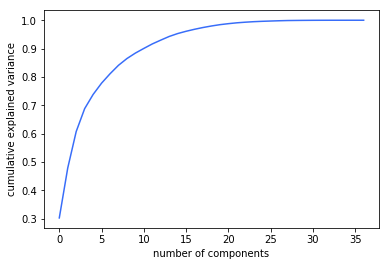

In [23]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).values)
ratio=np.cumsum(pca.explained_variance_ratio_)
plt.plot(ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(df_scaled.drop(['ASSESSED_VALUE','pct_change'],axis=1),df_scaled['pct_change'],test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(x_train.drop(['pct_change_bin'],axis=1),y_train)




y_pred1=L.predict(x_test.drop(['pct_change_bin'],axis=1))

from sklearn.metrics import r2_score, mean_squared_error

print('R2 score', r2_score(y_test,y_pred1))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.01273784607809103
RMSE 0.04305864333908065


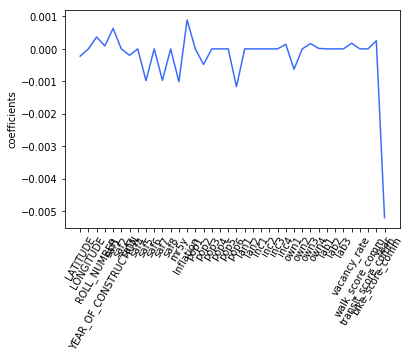

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001,normalize=False)
lasso_coef=lasso.fit(x_train.drop(['pct_change_bin'],axis=1),y_train).coef_
_=plt.plot(range(len(x_train.drop(['pct_change_bin'],axis=1).columns)),lasso_coef)
names=x_train.drop(['pct_change_bin'],axis=1).columns
_=plt.xticks(range(len(names)),names,rotation=60)
_=plt.ylabel("coefficients")
plt.show()

In [ ]:
#from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

#from sklearn.model_selection import cross_val_score

#def rmse_cv(model):
#    rmse= np.sqrt(-cross_val_score(model, x_train.drop(['pct_change_bin'],axis=1),y_train, scoring="neg_mean_squared_error", cv = 5))
#    return(rmse)

#alphas = [0.00001,0.0001,0.001,0.01, 0.1, 1, 10,100,1000]
#cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
#            for alpha in alphas]

#cv_ridge = pd.Series(cv_ridge, index = alphas)
#cv_ridge.plot(title = "Validation")
#plt.xlabel("alpha")
##plt.ylabel("rmse")

#cv_ridge.min()

In [ ]:
#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_r, y_r)
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
model_lasso = LassoCV(alphas = [0.0001]).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)

coef_lasso = pd.Series(model_lasso.coef_, index = names)
print("Lasso picked " + str(sum(coef_lasso != 0)) + " variables and eliminated the other " +  str(sum(coef_lasso == 0)) + " variables")

Lasso picked 18 variables and eliminated the other 20 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

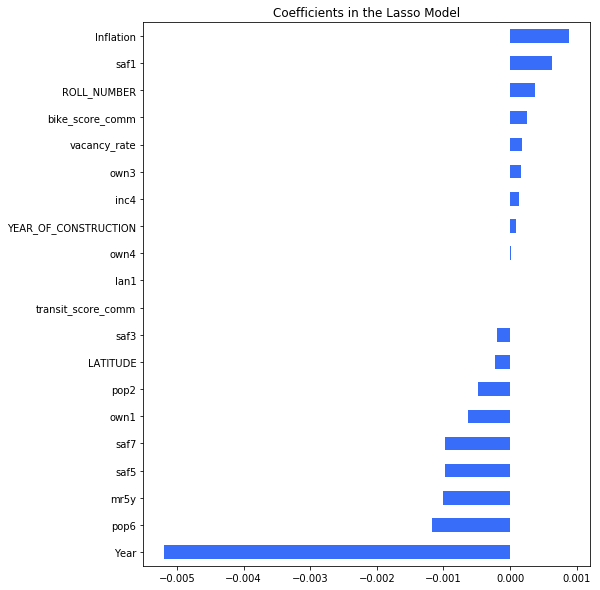

In [ ]:
imp_coef = pd.concat([coef_lasso.sort_values().head(10),
                     coef_lasso.sort_values().tail(10)])
#imp_coef = pd.concat([coef_lasso.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


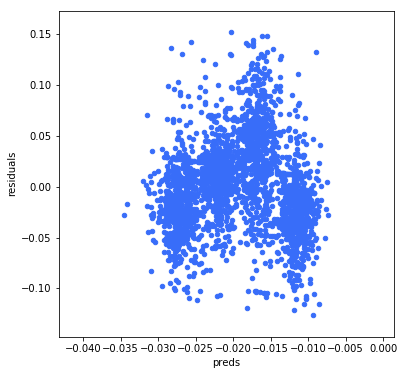

In [ ]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(x_test.drop(['pct_change_bin'],axis=1)), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")




In [ ]:
y_pred2 = model_lasso.predict(x_test.drop(['pct_change_bin'],axis=1))           
print(mean_squared_error(y_test, y_pred2))    

0.0018488652119887415


In [ ]:
coef_lasso[coef_lasso!=0]

LATITUDE               -0.000224
ROLL_NUMBER             0.000367
YEAR_OF_CONSTRUCTION    0.000091
saf1                    0.000631
saf3                   -0.000197
saf5                   -0.000980
saf7                   -0.000970
mr5y                   -0.001012
Inflation               0.000891
pop2                   -0.000480
pop6                   -0.001166
inc4                    0.000141
own1                   -0.000625
own3                    0.000164
own4                    0.000016
vacancy_rate            0.000174
bike_score_comm         0.000250
Year                   -0.005199
dtype: float64

In [ ]:
model_Ridge = RidgeCV(alphas = [0.0001]).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)

coef_Ridge = pd.Series(model_Ridge.coef_, index = names)
print("Ridge picked " + str(sum(coef_Ridge != 0)) + " variables and eliminated the other " +  str(sum(coef_Ridge == 0)) + " variables")

Ridge picked 38 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Coefficients in the Ridge Model')

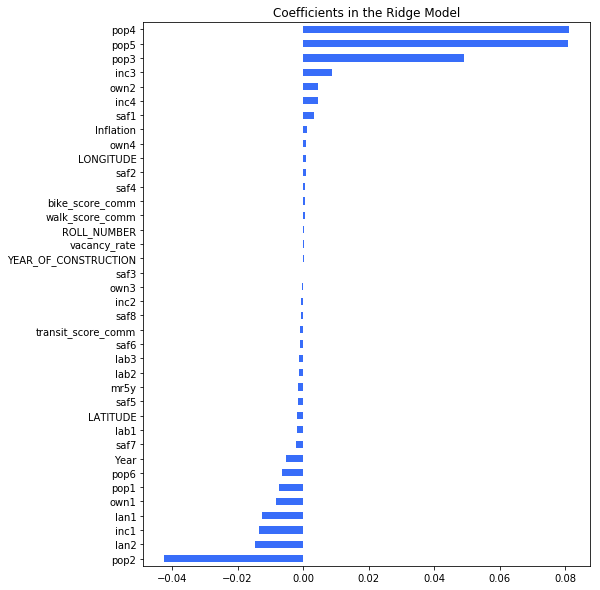

In [ ]:
imp_coef = pd.concat([coef_Ridge.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


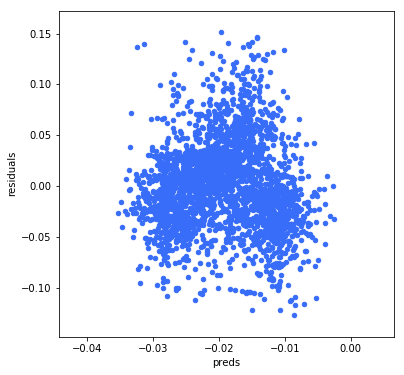

In [ ]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds_r = pd.DataFrame({"preds":model_Ridge.predict(x_test.drop(['pct_change_bin'],axis=1)), "true":y_test})
preds_r["residuals"] = preds_r["true"] - preds_r["preds"]
preds_r.plot(x = "preds", y = "residuals",kind = "scatter")




In [ ]:
y_pred3 = model_Ridge.predict(x_test.drop(['pct_change_bin'],axis=1))           
print(mean_squared_error(y_test, y_pred3))    

0.0018540462640291961


0.001848646367936797

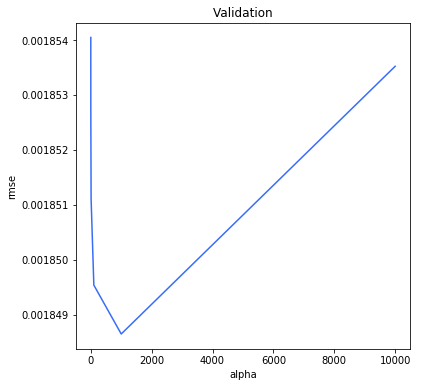

In [ ]:
alphas = [0.00001,0.0001,0.001,0.01, 0.1, 1, 10,100,1000,10**4]
cv_ridge = []
for alpha in alphas:
    model_Ridge = RidgeCV(alphas = [alpha]).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)
    y_pred3 = model_Ridge.predict(x_test.drop(['pct_change_bin'],axis=1))
    cv_ridge.append(mean_squared_error(y_test, y_pred3))
    
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse") 
cv_ridge.min()

/Users/DongyingWang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023145614905969225, tolerance: 0.0017055226635130623
  tol, rng, random, positive)
/Users/DongyingWang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03574446403274578, tolerance: 0.0016972496745360816
  tol, rng, random, positive)
/Users/DongyingWang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4822590565968152, tolerance: 0.0016964123691905336
  tol, rng, random, positive)
/Users/DongyingWang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coord

0.001847322506422104

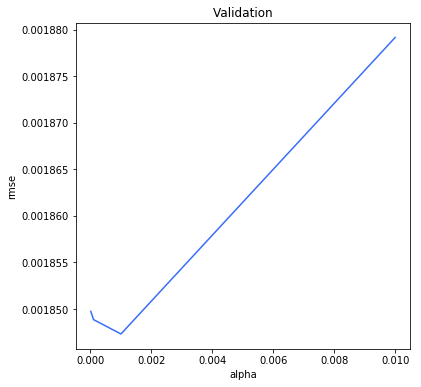

In [ ]:
alphas = [0.00001,0.0001,0.001,0.01]
cv_lasso = []
for alpha in alphas:
    model_lasso = LassoCV(alphas = [alpha]).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)
    y_pred3 = model_lasso.predict(x_test.drop(['pct_change_bin'],axis=1))
    cv_lasso.append(mean_squared_error(y_test, y_pred3))
    
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse") 
cv_lasso.min()

/Users/DongyingWang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4049797267106783, tolerance: 0.002126482691635016
  positive)


0.001848646367936797

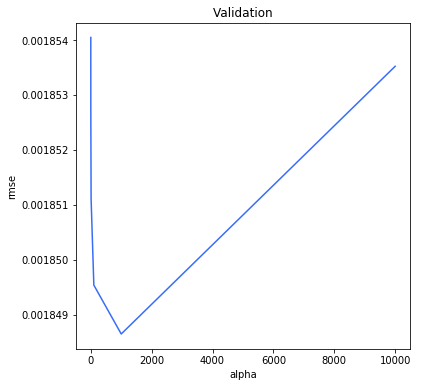

In [ ]:
alphas = [0.00001,0.0001,0.001,0.01, 0.1, 1, 10,100,1000,10**4]
cv_elastic = []
for alpha in alphas:
    model_elastic = ElasticNet(alpha = [alpha],l1_ratio=0.7).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)
    y_pred3 = model_elastic.predict(x_test.drop(['pct_change_bin'],axis=1))
    cv_elastic.append(mean_squared_error(y_test, y_pred3))
    
cv_elastic = pd.Series(cv_ridge, index = alphas)
cv_elastic.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse") 
cv_elastic.min()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


ElasticNet picked 19 variables and eliminated the other 19 variables
0.0018791635169321933


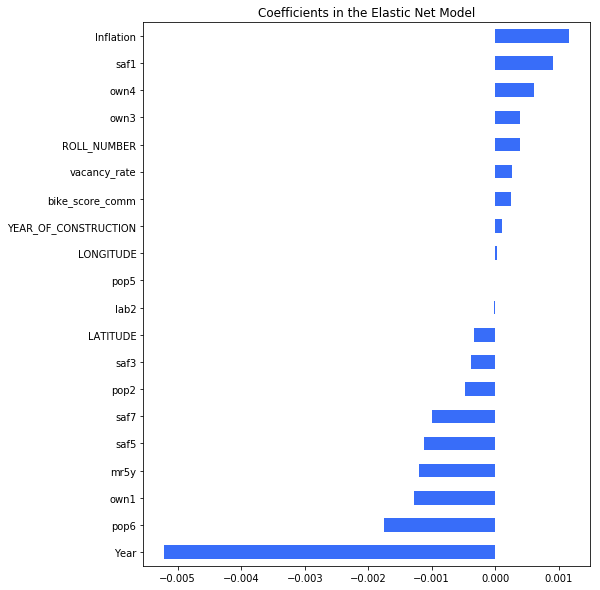

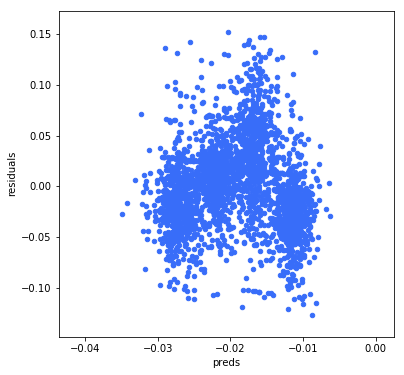

In [ ]:
model_elastic=ElasticNet(alpha = [0.0001],l1_ratio=0.7).fit(x_train.drop(['pct_change_bin'],axis=1),y_train)


coef_elastic = pd.Series(model_elastic.coef_, index = names)
print("ElasticNet picked " + str(sum(coef_elastic != 0)) + " variables and eliminated the other " +  str(sum(coef_elastic == 0)) + " variables")

imp_coef = pd.concat([coef_elastic.sort_values().head(10),
                     coef_elastic.sort_values().tail(10)])
#imp_coef = pd.concat([coef_lasso.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_elastic.predict(x_test.drop(['pct_change_bin'],axis=1)), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

y_pred4 = model_elastic.predict(x_test.drop(['pct_change_bin'],axis=1))           
print(mean_squared_error(y_test, y_pred3))    


In [ ]:
len(coef_elastic[coef_elastic!=0])

19

In [ ]:
coef_elastic[coef_elastic!=0]

LATITUDE               -0.000340
LONGITUDE               0.000025
ROLL_NUMBER             0.000385
YEAR_OF_CONSTRUCTION    0.000109
saf1                    0.000915
saf3                   -0.000380
saf5                   -0.001129
saf7                   -0.000995
mr5y                   -0.001198
Inflation               0.001169
pop2                   -0.000477
pop6                   -0.001758
own1                   -0.001287
own3                    0.000395
own4                    0.000614
lab2                   -0.000012
vacancy_rate            0.000266
bike_score_comm         0.000245
Year                   -0.005222
dtype: float64

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10975 entries, 7934 to 2788
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   LATITUDE              10975 non-null  float64 
 1   LONGITUDE             10975 non-null  float64 
 2   ROLL_NUMBER           10975 non-null  float64 
 3   YEAR_OF_CONSTRUCTION  10975 non-null  float64 
 4   saf1                  10975 non-null  float64 
 5   saf2                  10975 non-null  float64 
 6   saf3                  10975 non-null  float64 
 7   saf4                  10975 non-null  float64 
 8   saf5                  10975 non-null  float64 
 9   saf6                  10975 non-null  float64 
 10  saf7                  10975 non-null  float64 
 11  saf8                  10975 non-null  float64 
 12  mr5y                  10975 non-null  float64 
 13  Inflation             10975 non-null  float64 
 14  pop1                  10975 non-null  float64 
 15  

In [ ]:
feature_selected=['mr5y','saf8','Inflation','Year','LATITUDE','LONGITUDE','YEAR_OF_CONSTRUCTION','saf7','pop2','inc1','inc4','own3','lab2']
x_train2=x_train[feature_selected]
x_test2=x_test[feature_selected]
y_train_tree=x_train['pct_change_bin']
y_test_tree=x_test['pct_change_bin']




In [ ]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(x_train2,y_train)




y_pred1=L.predict(x_test2)

from sklearn.metrics import r2_score, mean_squared_error

print('R2 score', r2_score(y_test,y_pred1))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.015857219253279875
RMSE 0.04299056504738177


In [ ]:
c=DecisionTreeClassifier(min_samples_split=1000)
dt=c.fit(x_train2, y_train_tree)


/Users/DongyingWang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


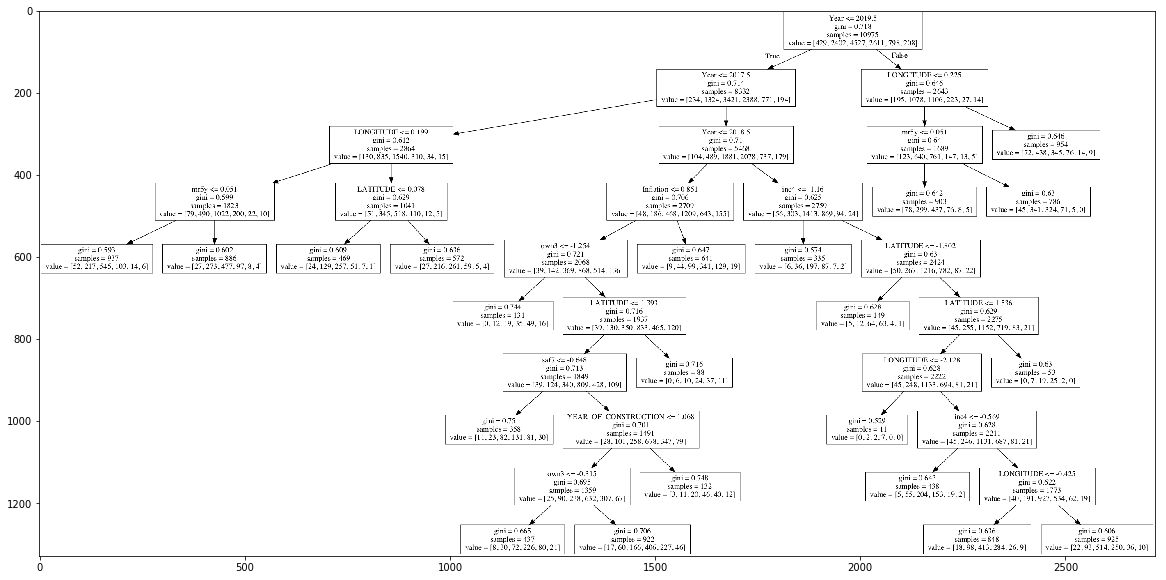

In [ ]:
def show_tree(tree, features, path):
    f=io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)
    
show_tree(dt,feature_selected,"dec_tree_02.png")

In [ ]:
y_pred_tree1=c.predict(x_test2)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test_tree,y_pred_tree1)*100
print("Accuracy using Decision Tree:", round(score, 1),"%")

Accuracy using Decision Tree: 48.5 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(n_estimators=8000)
model_rf.fit(x_train2, y_train_tree)
model_rf.score(x_test2, y_test_tree)

y_pred_rf=model_rf.predict(x_test2)
score_rf=accuracy_score(y_test_tree,y_pred_rf)*100
print("Accuracy using Decision Tree:", round(score_rf, 1),"%")

#model_rf.fit(x_train.drop(['pct_change_bin'],axis=1), y_train_tree)
#model_rf.score(x_test.drop(['pct_change_bin'],axis=1), y_test_tree)

In [ ]:


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_tree,y_pred_rf)
#cm=confusion_matrix(y_test,y_pred)
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_classifier=GradientBoostingClassifier()
GB_classifier.fit(x_train2, y_train_tree)

y_pred_g=GB_classifier.predict(x_test2)

print("Accuracy of Model:",accuracy_score(y_test_tree,y_pred_g))




In [ ]:
xgb_classifier=xgb.XGBClassifier(objective='multi:softprob')
#xgb_classifier.fit(x_train2, y_train_tree)
#y_pred_x=xgb_classifier.predict(x_test2)
xgb_classifier.fit(x_train.drop(['pct_change_bin'],axis=1), y_train_tree)
y_pred_x=xgb_classifier.predict(x_test.drop(['pct_change_bin'],axis=1))

print("Accuracy of Model:",accuracy_score(y_test_tree,y_pred_x))
#x_test.drop(['pct_change_bin'],axis=1)

In [ ]:
xgb.plot_importance(xgb_classifier)

#plt.rcParams['figure.figsize']=[1000,10]
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.show()

#plt.savefig("xgboost_figure.png", bbox_inches='tight', dpi=600)

In [ ]:
#x_train.drop(['pct_change_bin'],axis=1).info()

In [ ]:
xgb.plot_tree(xgb_classifier,num_trees=0)
plt.rcParams['figure.figsize']=[20,20]
#plt.show()
plt.savefig("xgboost_tree.png", bbox_inches='tight', dpi=600)

In [ ]:
cm=confusion_matrix(y_test_tree,y_pred_x)
#cm=confusion_matrix(y_test,y_pred)
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("confusion_xgboost.png", bbox_inches='tight', dpi=600)

In [ ]:
xgb_classifier=xgb.XGBClassifier(objective='multi:softprob')
xgb_classifier.fit(x_train2, y_train_tree)
y_pred_x=xgb_classifier.predict(x_test2)

print("Accuracy of Model:",accuracy_score(y_test_tree,y_pred_x))
#x_test.drop(['pct_change_bin'],axis=1)

In [ ]:
xgb.plot_importance(xgb_classifier)

#plt.rcParams['figure.figsize']=[1000,10]
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.show()

#plt.savefig("xgboost_figure.png", bbox_inches='tight', dpi=600)

In [ ]:
xgb.plot_tree(xgb_classifier,num_trees=0)
plt.rcParams['figure.figsize']=[20,20]
#plt.show()
plt.savefig("xgboost_tree.png", bbox_inches='tight', dpi=600)

In [ ]:
cm=confusion_matrix(y_test_tree,y_pred_x)
#cm=confusion_matrix(y_test,y_pred)
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("confusion_xgboost.png", bbox_inches='tight', dpi=600)

In [ ]:
#len(y_pred_x[y_pred_x==0])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor()

reg_dt.fit(x_train2, y_train)

importance_dt_reg = reg_dt.feature_importances_

for i,v in enumerate(importance_dt_reg):
    print('Feature: %0d, Score: %.5f' % (i,v))

    plt.bar([x for x in range(len(importance_dt_reg))], importance_dt_reg)
plt.show()

y_pred_dt_reg=reg_dt.predict(x_test2)
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt_reg)))


#y_pred_dt_reg=reg_dt.predict(x_test2)
#print("Accuracy of Model:",accuracy_score(y_test_tree,y_pred_dt_reg))


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()

reg_rf.fit(x_train2, y_train)

importance_reg_rf = reg_rf.feature_importances_

for i,v in enumerate(importance_reg_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance_reg_rf))], importance_reg_rf)
plt.show()

y_pred_rf_reg=reg_rf.predict(x_test2)
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf_reg)))


In [ ]:
from xgboost import XGBRegressor

reg_x = XGBRegressor()

reg_x.fit(x_train2, y_train)

importance_reg_x = reg_x.feature_importances_
for i,v in enumerate(importance_reg_x):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance_reg_x))], importance_reg_x)
plt.show()


y_pred_x_reg=reg_x.predict(x_test2)
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_x_reg)))
